In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#seed = 1234
#tf.set_random_seed(seed)
#np.random.seed(seed)

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data/MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
model_path = "models/mnist-shallow/model.ckpt"

In [6]:
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])
hidden_units = 1024

he_init = tf.contrib.layers.variance_scaling_initializer()

hidden_1 = tf.layers.dense(inputs=x, units=hidden_units, activation=tf.nn.relu, kernel_initializer=he_init)
hidden_2 = tf.layers.dense(inputs=hidden_1, units=hidden_units, activation=tf.nn.relu, kernel_initializer=he_init)
hidden_3 = tf.layers.dense(inputs=hidden_2, units=hidden_units, activation=tf.nn.relu, kernel_initializer=he_init)
hidden_4 = tf.layers.dense(inputs=hidden_3, units=hidden_units, activation=tf.nn.relu, kernel_initializer=he_init)
hidden_5 = tf.layers.dense(inputs=hidden_4, units=hidden_units, activation=tf.nn.relu, kernel_initializer=he_init)
y = tf.layers.dense(inputs=hidden_5, units=10, kernel_initializer=he_init)

In [5]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y, labels=y_))
train_step = tf.train.AdamOptimizer(.0001).minimize(cross_entropy)

In [7]:
init = tf.global_variables_initializer()

In [8]:
saver = tf.train.Saver()

In [11]:
sess = tf.Session()
sess.run(init)

In [9]:
i = 550
epochs = 50
display_step = 1

for epoch in range(epochs):
    avg_cost = 0
    for _ in range(i):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        _, cost = sess.run([train_step, cross_entropy], feed_dict={x: batch_xs, y_: batch_ys})
        avg_cost += cost/i
    if epoch%display_step==0:
        print("Epoch:", '%02d'%(epoch+1), "\tcost={:.9f}".format(avg_cost))

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = 100*tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('\nAccuracy:',sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

Epoch: 01 	cost=0.011455238
Epoch: 02 	cost=0.007534356
Epoch: 03 	cost=0.014104391
Epoch: 04 	cost=0.005787439
Epoch: 05 	cost=0.008773671
Epoch: 06 	cost=0.008198312
Epoch: 07 	cost=0.010107114
Epoch: 08 	cost=0.004292979
Epoch: 09 	cost=0.016260183
Epoch: 10 	cost=0.006456819
Epoch: 11 	cost=0.006940149
Epoch: 12 	cost=0.008041899
Epoch: 13 	cost=0.003496586
Epoch: 14 	cost=0.007386662
Epoch: 15 	cost=0.006789827
Epoch: 16 	cost=0.009781675
Epoch: 17 	cost=0.012709590
Epoch: 18 	cost=0.011998257
Epoch: 19 	cost=0.004296984
Epoch: 20 	cost=0.004989210
Epoch: 21 	cost=0.014694494
Epoch: 22 	cost=0.012614335
Epoch: 23 	cost=0.007328947
Epoch: 24 	cost=0.001809159
Epoch: 25 	cost=0.007030148
Epoch: 26 	cost=0.010636554
Epoch: 27 	cost=0.004669659
Epoch: 28 	cost=0.002355276
Epoch: 29 	cost=0.006692688
Epoch: 30 	cost=0.011692737
Epoch: 31 	cost=0.012675655
Epoch: 32 	cost=0.003505206
Epoch: 33 	cost=0.008744250
Epoch: 34 	cost=0.007708376
Epoch: 35 	cost=0.006115421
Epoch: 36 	cost=0.01

In [10]:
save_path = saver.save(sess, model_path)

Testing:-

In [9]:
test_subset, labels_one_hot = mnist.test.next_batch(1000)

In [12]:
saver.restore(sess, model_path)
op = sess.run(tf.nn.softmax(y), feed_dict={x:test_subset})
print('\n', op, '\n')
print(op.shape)

INFO:tensorflow:Restoring parameters from models/mnist-shallow/model.ckpt

 [[1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.9335553e-27 ... 6.4957849e-25
  6.0889081e-23 3.9626969e-33]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [9.1464510e-33 1.1557461e-35 0.0000000e+00 ... 0.0000000e+00
  5.0482645e-24 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]] 

(1000, 10)


Taking 10 dimensions having highest probability for each of the 10 classes to see classification accuracy

In [13]:
max_prob = sess.run(tf.argmax(op,1))
max_prob

array([0, 8, 3, 1, 3, 5, 8, 4, 4, 5, 5, 1, 8, 2, 7, 2, 8, 9, 0, 0, 2, 0,
       8, 3, 0, 1, 7, 5, 5, 4, 4, 0, 1, 3, 4, 8, 9, 5, 7, 0, 4, 9, 4, 6,
       4, 3, 9, 2, 0, 6, 2, 0, 7, 6, 3, 1, 9, 2, 5, 1, 6, 1, 0, 8, 0, 0,
       8, 7, 2, 2, 8, 4, 9, 1, 6, 3, 2, 6, 2, 1, 6, 1, 0, 1, 9, 4, 9, 1,
       6, 2, 2, 1, 5, 0, 1, 6, 3, 6, 8, 2, 1, 6, 8, 6, 3, 4, 6, 6, 3, 9,
       7, 2, 5, 1, 4, 3, 0, 5, 0, 8, 4, 7, 0, 8, 3, 1, 6, 9, 0, 9, 0, 6,
       8, 1, 8, 3, 8, 1, 5, 9, 2, 6, 8, 5, 9, 0, 3, 1, 0, 4, 1, 7, 2, 9,
       7, 0, 7, 7, 2, 3, 9, 3, 3, 3, 2, 5, 1, 2, 7, 9, 0, 4, 7, 6, 7, 3,
       7, 3, 1, 3, 2, 3, 6, 1, 3, 2, 1, 0, 9, 0, 4, 1, 4, 4, 7, 4, 3, 1,
       4, 2, 1, 1, 9, 0, 0, 8, 3, 1, 7, 5, 7, 6, 1, 2, 4, 6, 8, 8, 1, 0,
       1, 6, 2, 2, 7, 9, 8, 6, 1, 3, 9, 4, 6, 7, 0, 9, 4, 2, 0, 0, 0, 1,
       0, 8, 6, 4, 9, 9, 9, 3, 7, 2, 8, 0, 4, 8, 7, 8, 0, 8, 2, 3, 1, 9,
       4, 6, 3, 8, 0, 9, 4, 0, 0, 3, 5, 4, 4, 6, 5, 6, 4, 8, 0, 5, 3, 6,
       9, 0, 2, 5, 7, 3, 1, 1, 1, 3, 9, 0, 7, 8, 2,

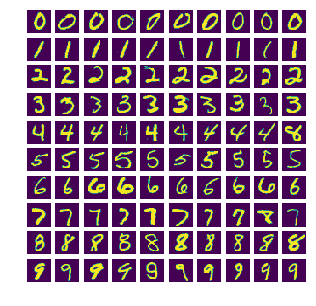

In [12]:
fig, axes = plt.subplots(10, 10, figsize=(5, 5))
for i in range(10):
    top_ten = np.where(max_prob==i)[0][:10]
    for j in range(10):
        axes[i][j].imshow((test_subset[top_ten[j]].reshape([28,28])))
        axes[i][j].axis('off')

The rows represent the classes and the columns represent the 10 images with highest probability for that class.
It can be seen that the classifier is working well.

#### Analyzing output of second last hidden layer:-

In [14]:
second_last = sess.run(hidden_5, feed_dict={x:test_subset})
idx = np.random.randint(low=0, high=1023, size=10)
rand_dims = second_last[:,idx]

In [15]:
max_prob2 = sess.run(tf.argmax(rand_dims,1))

[ 0  1  2  3  4  6  7  8 11 12]
[]
[  5   9  10  27  28  37  58  92 112 117]
[17 36 41 43 46 49 53 56 72 74]
[]
[]
[]
[]
[]
[]


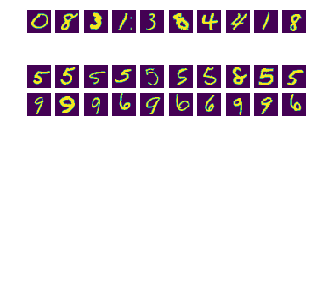

In [24]:
fig, axes = plt.subplots(10, 10, figsize=(5, 5))
for i in range(10):
    for j in range(10):
        axes[i][j].axis('off')

for i in range(10):
    top_ten = np.where(max_prob2==i)[0][:10]
    print(top_ten)
    for j in range(len(top_ten)):
        axes[i][j].imshow((test_subset[top_ten[j]].reshape([28,28])))

As compared to the earlier results, it can be seen that there are many missing rows and the images present in rows do not align with the actual class labels. 

One point to note is that the use of ReLU activation function results in cutting off any negative valued linear combinations which can result in some 1024-dim vectors to contain all zeros. 

By choosing 10 random dimensions out of 1024, we are surely losing out information and after taking the max out of the 10 dimensions, we get class labels that do not correspond to the correct label. This is because the 10 neurons chosen at random might not have fired and so there are dimensions with less than 10 images associated. 

In an ideal sitation for the second-to-last layer, the 10 neurons that are chosen at random should all be fired. Thus each neuron would have images associated in the 1000x10 output. 

#### Seeing how TSNE & PCA performs:-

In [25]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [26]:
tsne = TSNE().fit_transform(test_subset)

In [27]:
tsne.shape

(1000, 2)

In [31]:
labels = np.argmax(labels_one_hot, 1)

In [29]:
# to get means of each cluster to overlay class labels in plots below
 
def get_means(arr):
    means = []
    indices = [[] for i in range(10)]
    
    for i in range(10):
        indices[i] = np.where(i==labels)[0]

    for i in range(10):
        xcord = np.mean(arr[indices[i], 0])
        ycord = np.mean(arr[indices[i], 1])
        means.append([xcord, ycord])
        
    return np.array(means)

Applying tSNE & PCA on 1000 test samples


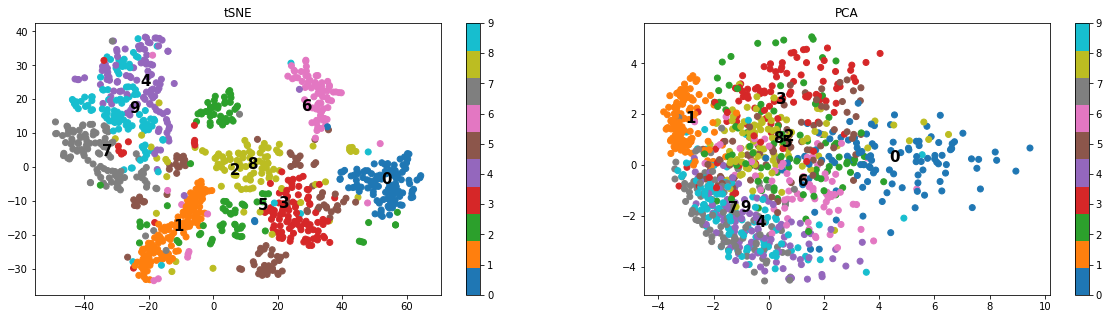

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

means = get_means(tsne)
axes[0].scatter(means[:,0], means[:,1], c='white')

for j in range(10):
    axes[0].annotate(j, (means[j][0], means[j][1]), weight='bold', size=15)
        
im1 = axes[0].scatter(tsne[:,0], tsne[:,1], c=labels, cmap=plt.cm.tab10)
axes[0].set_title('tSNE')
fig.colorbar(im1, ax=axes[0])


pca = PCA(n_components=2).fit_transform(test_subset)

means = get_means(pca)
axes[1].scatter(means[:,0], means[:,1], c='white')
for j in range(10):
    axes[1].annotate(j, (means[j][0], means[j][1]), weight='bold', size=15)
    
im2 = axes[1].scatter(pca[:,0], pca[:,1], c=labels, cmap=plt.cm.tab10)
fig.colorbar(im1, ax=axes[1])
axes[1].set_title('PCA')

print('Applying tSNE & PCA on 1000 test samples')

As it can be seen above, the data cannot be classified by looking at the PCA scatter plot. Except for class 1, there is a lot of overlap among all the other classes. However, in the tSNE plot, the raw image samples seem to be classified better. There is still some overlap among some classes (such as 4 & 9, 3 & 5, 2 & 8) but the outcome is more distinguishable than PCA.  

In [35]:
first_hidden = sess.run(hidden_1, feed_dict={x:test_subset})

In [36]:
tsne_first_hidden = TSNE().fit_transform(first_hidden)

Applying tSNE & PCA on output of first hidden layer


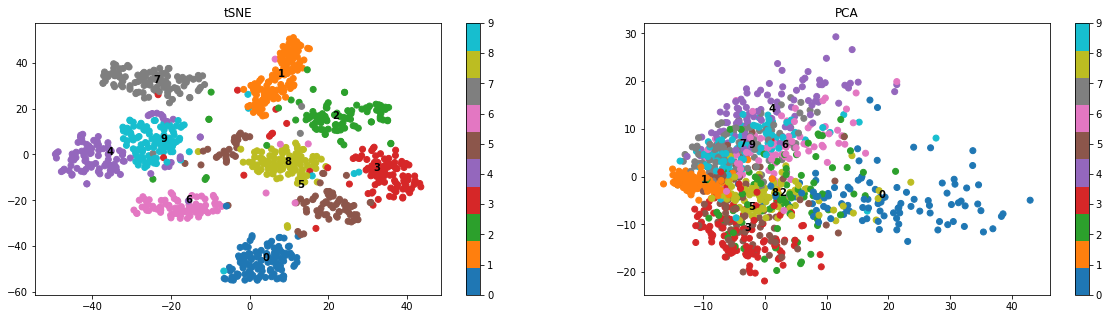

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

means = get_means(tsne_first_hidden)
axes[0].scatter(means[:,0], means[:,1], c='white')
for j in range(10):
    axes[0].annotate(j, (means[j][0], means[j][1]), size=10, weight='bold')

im1 = axes[0].scatter(tsne_first_hidden[:,0], tsne_first_hidden[:,1], c=labels, cmap=plt.cm.tab10)
axes[0].set_title('tSNE')
fig.colorbar(im1, ax=axes[0])


pca_first_hidden = PCA(n_components=2).fit_transform(first_hidden)

means = get_means(pca_first_hidden)
axes[1].scatter(means[:,0], means[:,1], c='white')
for j in range(10):
    axes[1].annotate(j, (means[j][0], means[j][1]), size=10, weight='bold')

im2 = axes[1].scatter(pca_first_hidden[:,0], pca_first_hidden[:,1], c=labels, cmap=plt.cm.tab10)
axes[1].set_title('PCA')
fig.colorbar(im2, ax=axes[1])

print('Applying tSNE & PCA on output of first hidden layer')




Seeing performance of TSNE and PCA on all remaining layers:

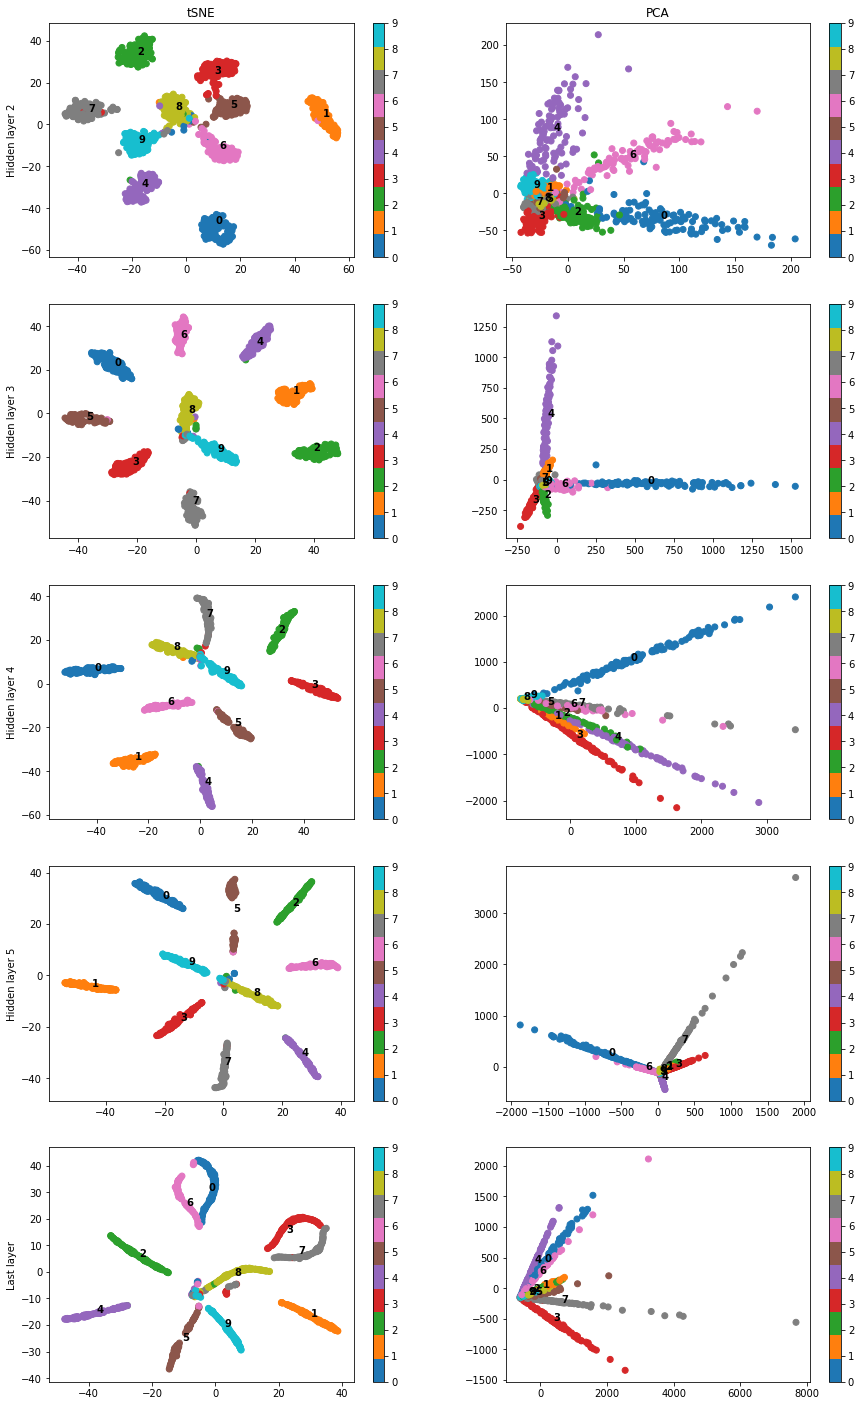

In [32]:
layers = [hidden_2, hidden_3, hidden_4, hidden_5, y]

fig, axes = plt.subplots(5, 2, figsize=(15, 25))

axes[0][0].set_title('tSNE')
axes[0][1].set_title('PCA')

for i in range(len(layers)):
    layer_op = sess.run(layers[i], feed_dict={x:test_subset})
    
    tsne = TSNE().fit_transform(layer_op)
    pca = PCA(n_components=2).fit_transform(layer_op)
    
    means_tsne = get_means(tsne)
    axes[i][0].scatter(means_tsne[:,0], means_tsne[:,1], c='white')
    for j in range(10):
        axes[i][0].annotate(j, (means_tsne[j][0], means_tsne[j][1]), size=10, weight='bold')
    
    im1 = axes[i][0].scatter(tsne[:,0], tsne[:,1], c=labels, cmap=plt.cm.tab10)
    fig.colorbar(im1, ax=axes[i][0])
        
    means_pca = get_means(pca)
    axes[i][1].scatter(means_pca[:,0], means_pca[:,1], c='white')
    for j in range(10):
        axes[i][1].annotate(j, (means_pca[j][0], means_pca[j][1]), size=10, weight='bold')
        
    im2 = axes[i][1].scatter(pca[:,0], pca[:,1], c=labels, cmap=plt.cm.tab10)
    fig.colorbar(im2, ax=axes[i][1])
    
    if i==len(layers)-1:
        axes[i][0].set_ylabel('Last layer')
    else:
        axes[i][0].set_ylabel('Hidden layer {}'.format(i+2))

It is visible that as we go deeper into the neural network, the data is classified better by both the PCA ans tSNE methods. When the output of each hidden layer (which is a 1024-dim vector) is brought down to 2 dimensions by both the algorightms, classifying the data is still possible.

In [39]:
sess.close()